# Project Three
This project analyzes two different plans from Megaline in order to determine which plan generates more revanue for the company. The data will then influence the advertising budget in order to push users towards the more lucrative plan. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats



In [2]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')


In [3]:
plans.info()

plans.describe()


               



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [4]:
display(plans.sample(2))



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf



There are only two rows for this dataframe, and it shows the differences between the plans well. I see no immediately obvious issues with the data, and the data types seem appropriate for each column. There are no missing data points, and all data points seem reasonable. 

In [5]:
users.info()

users['age'].describe()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


count    500.000000
mean      45.486000
std       16.972269
min       18.000000
25%       30.000000
50%       46.000000
75%       61.000000
max       75.000000
Name: age, dtype: float64

In [6]:
users.sample(5)



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
477,1477,Magaly,Rivas,52,"Riverside-San Bernardino-Ontario, CA MSA",2018-08-24,ultimate,NaN
148,1148,Dwana,Moore,67,"Columbia, SC MSA",2018-11-04,surf,NaN
383,1383,Margarito,Mccoy,52,"Tampa-St. Petersburg-Clearwater, FL MSA",2018-10-10,ultimate,NaN
434,1434,Kai,Barr,18,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-06,surf,NaN


I would argue that user_id should be converted into the object data type as it existing as a numerical data type serves no purpose. Each exists in orer to identify a particular user, so it should be represented as an object. Additionally, the churn_date column contains only 34 non-null values, indicated that the vast majority of entries are missing this value. Missing values in this category mean that the user is still using the service. It might be better to use an identifier other than NaN to avoid confusion. Convert date time to date time data type. 

In [7]:
users['user_id'] = users['user_id'].astype('object')

users['churn_date']=users['churn_date'].fillna('Still Using')


users['reg_date'] = pd.to_datetime(users['reg_date'])

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 31.4+ KB


In [8]:
calls.info()
calls['duration'].describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

In [9]:
calls.sample(5)



,id,user_id,call_date,duration
103057,1365_253,1365,2018-11-12,4.62
16220,1064_78,1064,2018-08-24,6.34
122719,1434_2,1434,2018-07-04,14.59
11192,1049_359,1049,2018-12-03,4.88
39958,1147_773,1147,2018-10-04,12.36


As in the last dataframe, I take issue with user_id being an integer. I will need to convert it to become an object, as it does not make sence to treat it as an integer category. There are no other obvious issues and no missing data that I can see. I will convert the date to date time data type. 


In [10]:
calls['user_id'] = calls['user_id'].astype('object')

calls['call_date'] = pd.to_datetime(calls['call_date'])

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


In [11]:
messages.info()

messages.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [12]:
messages.sample(5)



,id,user_id,message_date
49120,1328_78,1328,2018-07-13
38696,1254_249,1254,2018-12-30
37236,1247_400,1247,2018-10-25
11049,1077_320,1077,2018-12-23
10291,1076_661,1076,2018-11-22


I will convert user_id to be an object. I will convert message_date to date time data type.

In [13]:
messages['user_id'] = messages['user_id'].astype('object')

messages['message_date'] = pd.to_datetime(messages['message_date'])

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


In [14]:
internet.info()

internet.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [15]:
internet.sample(5)



,id,user_id,session_date,mb_used
22681,1103_226,1103,2018-12-21,713.73
56421,1255_61,1255,2018-10-03,453.13
66972,1312_195,1312,2018-07-13,518.87
14055,1065_151,1065,2018-11-09,358.36
33824,1153_412,1153,2018-09-09,0.00


There are no missing values, and there are no obvious issues. I will make user_id an object data type, and session_date the date time data type.  

In [16]:
internet['user_id'] = internet['user_id'].astype('object')

internet['session_date'] = pd.to_datetime(internet['session_date'])

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


In [17]:
display(plans)



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [18]:

calls['month'] = calls['call_date'].dt.month


calls_per_month = calls.groupby(['user_id', 'month'])['id'].count()

display(calls_per_month.sample(10))






user_id  month
1396     10        47
1144     5         82
1328     6        122
1343     9         63
1155     5         30
1357     5          2
1420     9         40
1403     8         33
1156     6         78
1046     9         79
Name: id, dtype: int64

In [19]:


minutes_per_month = np.ceil(calls.groupby(['user_id', 'month'])['duration'].sum())

display(minutes_per_month.sample(10))



user_id  month
1326     9        792.0
1113     11       526.0
1196     4        463.0
1099     2         37.0
1465     11       864.0
1483     5        388.0
1196     5        405.0
1296     11       280.0
1393     12       844.0
1408     4        403.0
Name: duration, dtype: float64

In [20]:
messages['month'] = messages['message_date'].dt.month


messages_per_month = messages.groupby(['user_id', 'month'])['id'].count()

display(messages_per_month.sample(10))



user_id  month
1090     8        22
1138     7        11
1065     10       29
1100     8        36
1187     11        8
1099     12       31
1440     5         2
1125     12       54
1347     10       73
1251     9        29
Name: id, dtype: int64

In [21]:
internet['month'] = internet['session_date'].dt.month

internet['gb_used'] = np.ceil(internet['mb_used'] / 1024)  




gb_per_month = internet.groupby(['user_id', 'month'])['gb_used'].sum()

display(gb_per_month.sample(10)) 


user_id  month
1110     9        63.0
1099     2         1.0
1489     12       37.0
1363     12       50.0
1028     12       78.0
1140     7        54.0
1040     12       37.0
1460     9        67.0
1285     11        9.0
1175     10       50.0
Name: gb_used, dtype: float64

In [22]:
df1 = calls_per_month.to_frame()
df2 = minutes_per_month.to_frame()
df3 = messages_per_month.to_frame()
df4 = gb_per_month.to_frame()

user_behavior = df1.merge(df2, on=['user_id', 'month'], how='outer')\
                   .merge(df3, on=['user_id', 'month'], how='outer')\
                   .merge(df4, on=['user_id', 'month'], how='outer')


user_behavior = user_behavior.rename(columns={'id_x': 'calls_per_month', 'id_y':'messages_per_month', 'duration': 'minutes_per_month', 'gb_used': 'gb_used_per_month'})
user_behavior= user_behavior.reset_index()
display(user_behavior.sample(10))







,user_id,month,calls_per_month,minutes_per_month,messages_per_month,gb_used_per_month
188,1046,12,83.0,605.0,32.0,42.0
1369,1302,11,70.0,450.0,68.0,54.0
1970,1431,12,99.0,634.0,39.0,65.0
569,1123,6,6.0,41.0,1.0,4.0
997,1214,7,62.0,445.0,24.0,51.0
2016,1440,10,83.0,535.0,39.0,52.0
1091,1237,12,105.0,700.0,41.0,41.0
426,1090,11,62.0,446.0,24.0,52.0
276,1062,4,46.0,284.0,5.0,43.0
124,1034,8,2.0,6.0,4.0,2.0


In [23]:
user_behavior_plan = user_behavior.merge(users[['user_id', 'plan']], on='user_id', how='outer')
user_behavior_plan = user_behavior_plan.rename(columns={'plan': 'plan_name'})



display(user_behavior_plan.sample(10))




,user_id,month,calls_per_month,minutes_per_month,messages_per_month,gb_used_per_month,plan_name
1559,1343.0,12.0,63.0,450.0,115.0,38.0,surf
2134,1470.0,6.0,72.0,535.0,133.0,NaN,surf
927,1197.0,12.0,110.0,744.0,11.0,45.0,surf
10,1004.0,5.0,21.0,182.0,7.0,14.0,surf
104,1028.0,2.0,NaN,NaN,12.0,23.0,ultimate
642,1140.0,6.0,26.0,160.0,3.0,18.0,surf
217,1052.0,12.0,177.0,1137.0,266.0,51.0,surf
534,1114.0,9.0,87.0,595.0,95.0,24.0,surf
1644,1361.0,12.0,53.0,479.0,49.0,44.0,surf
741,1159.0,8.0,93.0,707.0,73.0,14.0,ultimate


In [24]:

merged_df = pd.merge(user_behavior_plan, plans, on='plan_name')


merged_df['extra_minutes'] = np.where(merged_df['minutes_per_month'] > merged_df['minutes_included'], merged_df['minutes_per_month'] - merged_df['minutes_included'], 0)
merged_df['extra_messages'] = np.where(merged_df['messages_per_month'] > merged_df['messages_included'], merged_df['messages_per_month'] - merged_df['messages_included'], 0)
merged_df['extra_gb'] = np.where(merged_df['gb_used_per_month'] > (merged_df['mb_per_month_included']/1024), merged_df['gb_used_per_month'] - (merged_df['mb_per_month_included']/1024), 0)


merged_df['extra_minutes_charge'] = merged_df['extra_minutes'] * merged_df['usd_per_minute']
merged_df['extra_messages_charge'] = merged_df['extra_messages'] * merged_df['usd_per_message']
merged_df['extra_gb_charge'] = merged_df['extra_gb'] * merged_df['usd_per_gb']


merged_df['total_revenue'] = merged_df[['usd_monthly_pay', 'extra_minutes_charge', 'extra_messages_charge', 'extra_gb_charge']].sum(axis=1)


revenue_per_user_per_month = merged_df.groupby(['user_id', 'month'])[['total_revenue']].sum().reset_index()

display(revenue_per_user_per_month.sample(10))




,user_id,month,total_revenue
938,1195.0,12.0,177.74
634,1133.0,9.0,189.00
1188,1252.0,8.0,200.00
416,1087.0,11.0,50.00
1882,1403.0,10.0,273.00
1901,1406.0,7.0,360.00
1307,1278.0,12.0,490.00
487,1102.0,12.0,70.00
1511,1328.0,11.0,400.56
365,1077.0,5.0,168.00


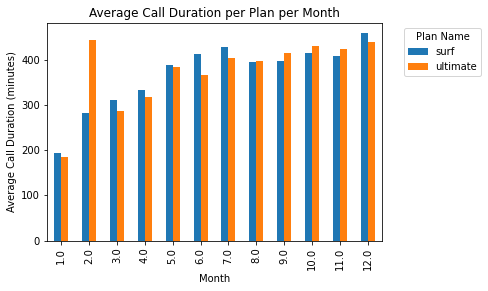

In [25]:
average_duration = user_behavior_plan.groupby(['plan_name', 'month'])['minutes_per_month'].mean().unstack('plan_name')

average_duration.plot(kind='bar', stacked=False)
plt.title('Average Call Duration per Plan per Month')
plt.xlabel('Month')
plt.ylabel('Average Call Duration (minutes)')
plt.legend(title='Plan Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




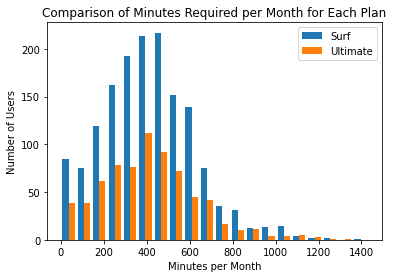

In [26]:
surf = user_behavior_plan[user_behavior_plan['plan_name'] == 'surf']['minutes_per_month']
ultimate = user_behavior_plan[user_behavior_plan['plan_name'] == 'ultimate']['minutes_per_month']

# Plot the histogram
plt.hist([surf, ultimate], bins=20, label=['Surf', 'Ultimate'])
plt.xlabel('Minutes per Month')
plt.ylabel('Number of Users')
plt.title('Comparison of Minutes Required per Month for Each Plan')
plt.legend()
plt.show()



In [27]:
surf_mean = surf.mean()
surf_variance = surf.var()


ultimate_mean = ultimate.mean()
ultimate_variance = ultimate.var()

print("Surf Plan: Mean = ", surf_mean, ", Variance = ", surf_variance)
print("Ultimate Plan: Mean = ", ultimate_mean, ", Variance = ", ultimate_variance)



Surf Plan: Mean =  412.5948220064725 , Variance =  47003.00411824874
Ultimate Plan: Mean =  410.70126227208976 , Variance =  50517.26877649432


<Figure size 720x432 with 0 Axes>

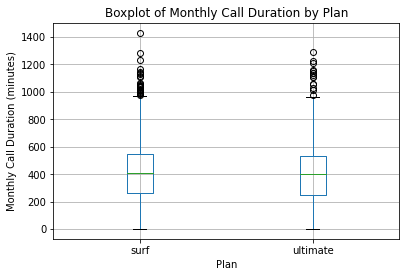

In [28]:
plt.figure(figsize=(10, 6))
merged_df.boxplot(by='plan_name', column='minutes_per_month')

plt.xlabel('Plan')
plt.ylabel('Monthly Call Duration (minutes)')
plt.title('Boxplot of Monthly Call Duration by Plan')
plt.suptitle('')
plt.show()






It seems that although there are small differences in user behavior, these do not seem to be significant. Users of both plans seem to, in the aggregate, use their minutes similarly. 

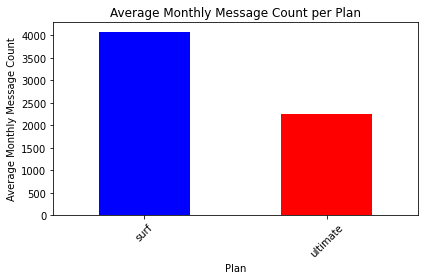

In [29]:


messages['year_month'] = messages['message_date'].dt.to_period('M')


df = pd.merge(messages, users, on='user_id')


monthly_messages_per_plan = df.groupby(['plan', 'year_month']).size()


monthly_messages_per_plan = monthly_messages_per_plan.reset_index(name='message_count')


average_monthly_messages_per_plan = monthly_messages_per_plan.groupby('plan')['message_count'].mean()


average_monthly_messages_per_plan.plot(kind='bar', color=['b', 'r'])

plt.xlabel('Plan')
plt.ylabel('Average Monthly Message Count')
plt.title('Average Monthly Message Count per Plan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





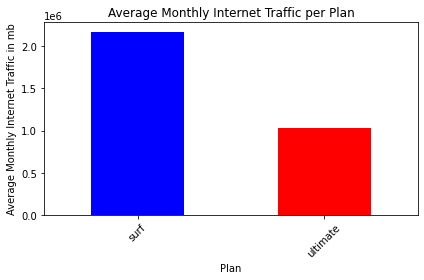

In [30]:

internet['year_month'] = internet['session_date'].dt.to_period('M')


df = pd.merge(internet, users, on='user_id')


monthly_internet_per_plan = df.groupby(['plan', 'year_month'])['mb_used'].sum()


monthly_internet_per_plan = monthly_internet_per_plan.reset_index()


average_monthly_internet_per_plan = monthly_internet_per_plan.groupby('plan')['mb_used'].mean()


average_monthly_internet_per_plan.plot(kind='bar', color=['b', 'r'])

plt.xlabel('Plan')
plt.ylabel('Average Monthly Internet Traffic in mb')
plt.title('Average Monthly Internet Traffic per Plan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





From the above analysis, it seems reasonable to conclude that for both messages and internet traffic, surf users are significantly heavier users of those respective services. 

  plan_name        mb_used
0      surf  109845.805208
1  ultimate  117129.931778


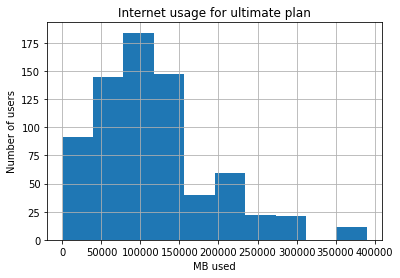

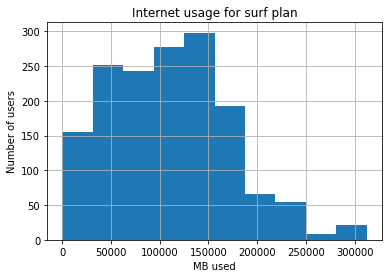

In [31]:



internet_usage = internet.groupby('user_id')['mb_used'].sum().reset_index()


merged_data = pd.merge(internet_usage, user_behavior_plan, on='user_id')


average_usage_by_plan = merged_data.groupby('plan_name')['mb_used'].mean().reset_index()

print(average_usage_by_plan)


for plan in merged_data['plan_name'].unique():
    plt.figure()
    merged_data[merged_data['plan_name'] == plan]['mb_used'].hist()
    plt.title(f'Internet usage for {plan} plan')
    plt.xlabel('MB used')
    plt.ylabel('Number of users')
    plt.show()

It seems on first glance that members of the surf plan have a greater portion that use high amounts of data when compared to the ultimate plan. The distributions seems to be scewed farther to right for the surf plan, however it seems that some significant outliers in the ultimate plan make a significant difference in the mean. 

In [32]:
merged_dff = pd.merge(revenue_per_user_per_month, user_behavior_plan, on='user_id')


grouped = merged_dff.groupby('plan_name')['total_revenue']

display(grouped.describe())

,count,mean,std,min,25%,50%,75%,max
plan_name,,,,,,,,
surf,10241.0,286.27854,154.267356,20.0,195.46,295.37,390.0,1208.66
ultimate,4668.0,173.87832,86.974020,70.0,105.00,161.00,224.0,532.00


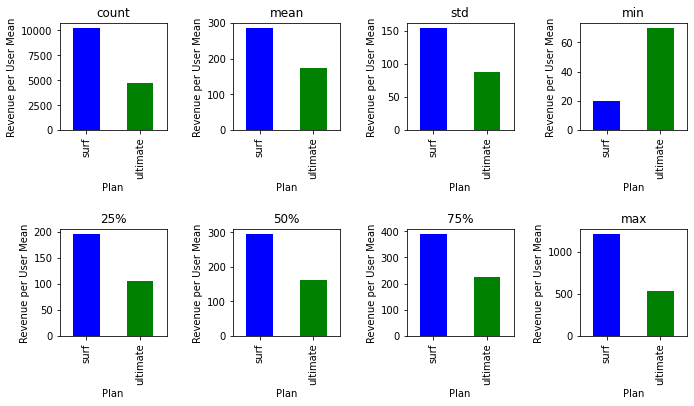

In [33]:
grouped = merged_dff.groupby('plan_name')['total_revenue']


summary = grouped.describe()


plt.figure(figsize=(10, 6))


for i, stat in enumerate(summary.columns):
    plt.subplot(2, 4, i+1)
    summary[stat].plot(kind='bar', color=['blue', 'green'])
    plt.title(stat)
    plt.ylabel('Revenue per User Mean')
    plt.xlabel('Plan')


plt.tight_layout(pad=2)


plt.show()

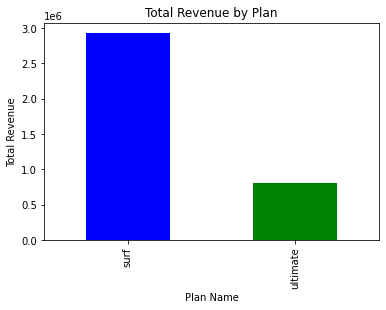

In [34]:
merged_dfff = pd.merge(revenue_per_user_per_month, user_behavior_plan, on='user_id')


total_revenue = merged_dfff.groupby('plan_name')['total_revenue'].sum()


total_revenue.plot(kind='bar', color=['blue', 'green'])

plt.title('Total Revenue by Plan')
plt.xlabel('Plan Name')
plt.ylabel('Total Revenue')


plt.show()

No matter how you look at it, either through total revenue generated, or by the mean revenue generated per user, it seems that surf is far more lucrative. The surf plan generates more money per user, and also generates more money in terms of total revenue. 

The null hypothesis is that the user revanue for both plans are not statistically different from each other. It will be statistically significant if the ttest reveals a p value below 0.05. 

In [35]:

merged_df = pd.merge(revenue_per_user_per_month, user_behavior_plan, on='user_id')


surf_revenue = merged_df[merged_df['plan_name'] == 'surf']['total_revenue']
ultimate_revenue = merged_df[merged_df['plan_name'] == 'ultimate']['total_revenue']
                                                                


p_val = stats.ttest_ind(surf_revenue, ultimate_revenue).pvalue

alpha=0.05

print('P-value:', p_val)

if p_val < alpha:
    print("We reject the null hypothesis : The revenues differ between the plans")
else:
    print("We fail to reject the null hypothesis")


P-value: 0.0
We reject the null hypothesis : The revenues differ between the plans


The null hypothesis is that users from NY-NJ differ in their average revenue when compared to other regions. Alpha will be .05. 

In [36]:

data = pd.merge(users, revenue_per_user_per_month, on='user_id')

ny_nj_data = data[data['city'].str.contains('NY-NJ')]['total_revenue']
other_data = data[~data['city'].str.contains('NY-NJ')]['total_revenue']

p_val = stats.ttest_ind(ny_nj_data, other_data).pvalue

print('p-value:', p_val)


if p_val < alpha:
    print("We reject the null hypothesis : Users from NY-NJ seem to differ significantly when compared to other areas.")
else:
    print("We fail to reject the null hypothesis : Users from NY-NJ seem to be similar to those from other areas")
    

p-value: 0.006398406062037394
We reject the null hypothesis : Users from NY-NJ seem to differ significantly when compared to other areas.


## General conclusion



 Some broad conclusions from the data include the fact that the Surf plan seems to be the best at generating revanue on a per user basis as well as on a total revanue basis. Having more advertisements aimed at funneling people into this plan would likely result in greater revenues for the business. Additionally, it has been shown using a ttest that yes, revenues differ between these plans to a statistically significant degree. It has been shown statistically that when compared to other regions, New York and New Jersey seem to be unsimilar in terms of revenue generated per user. On many metrics, driving users to the Surf would mean less baseline revenue if those users don't use more data, messages or minutes, however, it seems that for some reason users actually use more of many of these metrics on the Surf plan, despite it being more expensive for them to do so. 